## SUPPORT VECTOR MACHINE
### Dataset Selection:
Data set Description described in another document “Drug Response Classification”
### Task 1: Exploratory Data Analysis (EDA)
1.	Load the dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
### Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.
### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

In [1]:
# Task 1: Exploratory Data Analysis (EDA)
# 1.Load the dataset and perform fundamental data exploration.
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csvdf=pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [3]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
df.tail()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0
499,-1.143726,0.715320,0.108560,-0.509787,-0.250704,1


In [5]:
df.shape

(500, 6)

In [6]:
df.columns.tolist()

['Drug Dosage (mg)',
 'Systolic Blood Pressure (mmHg)',
 'Heart Rate (BPM)',
 'Liver Toxicity Index (U/L)',
 'Blood Glucose Level (mg/dL)',
 'Drug Response']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [8]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [9]:
df.isna().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# 2.Utilize histograms, box plots, or density plots to understand feature distributions.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")
numeric_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols

['Drug Dosage (mg)',
 'Systolic Blood Pressure (mmHg)',
 'Heart Rate (BPM)',
 'Liver Toxicity Index (U/L)',
 'Blood Glucose Level (mg/dL)',
 'Drug Response']

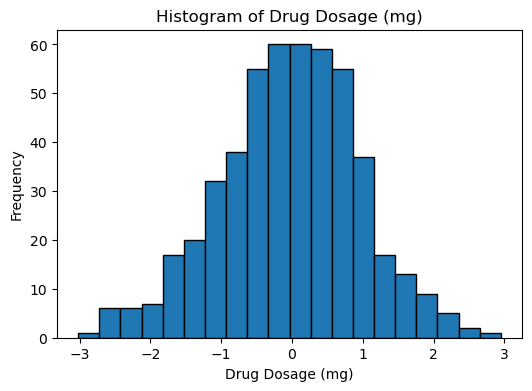

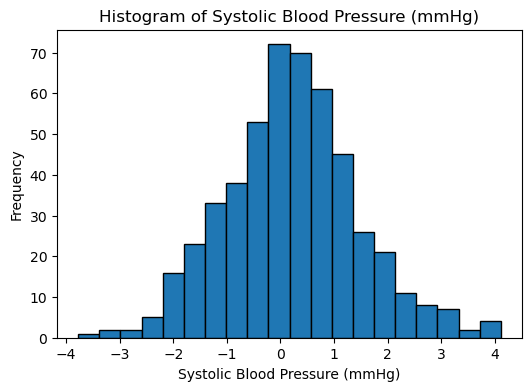

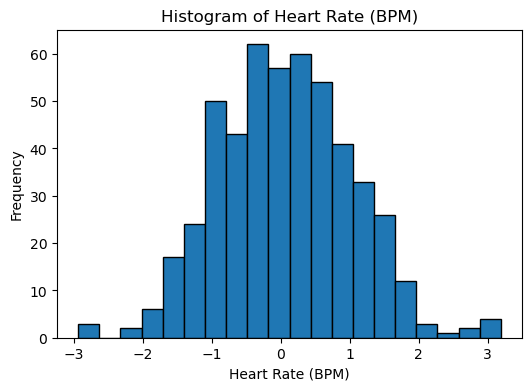

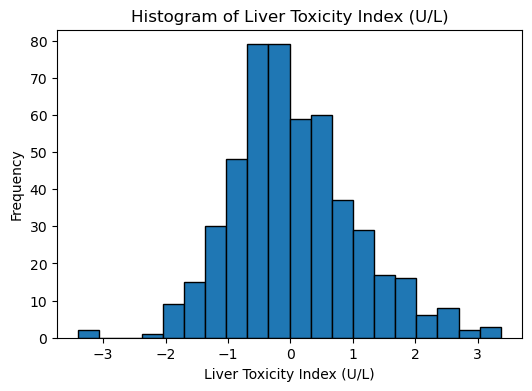

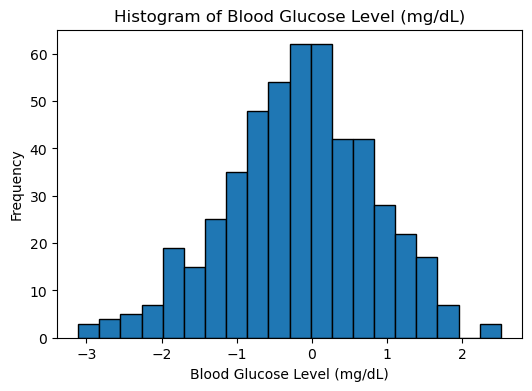

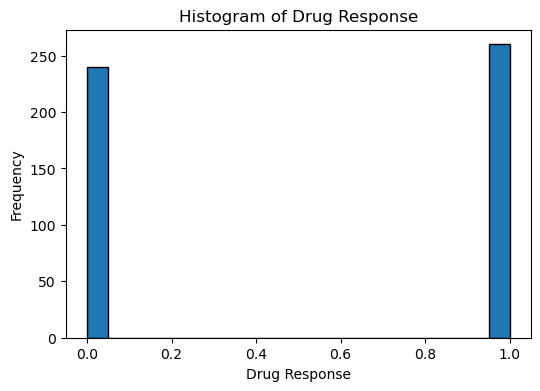

In [12]:
# Histograms for each feature
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

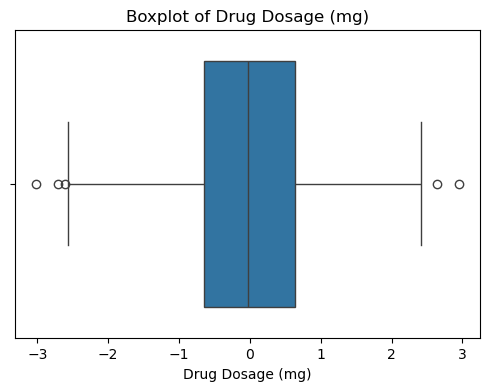

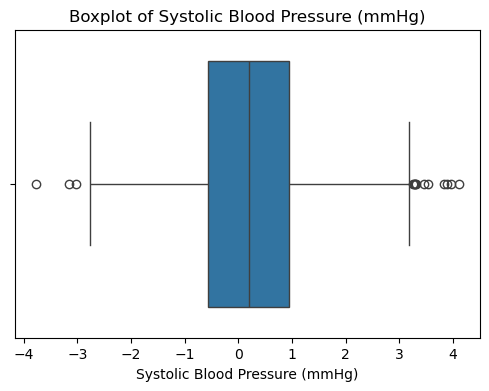

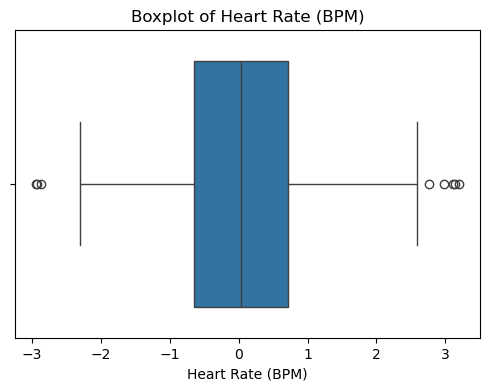

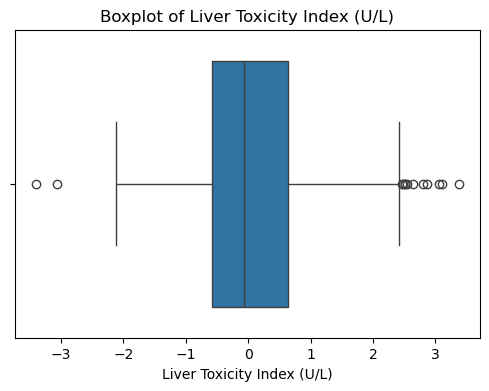

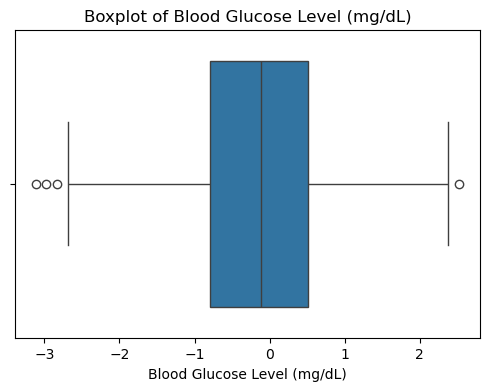

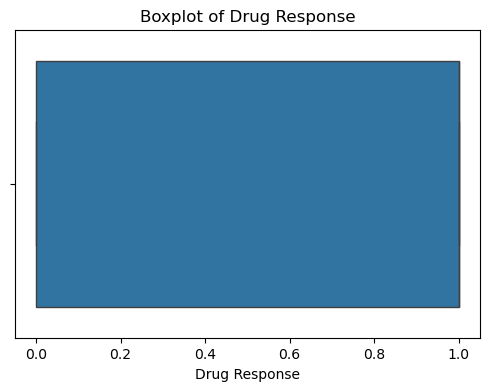

In [13]:
# Boxplots for each feature
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


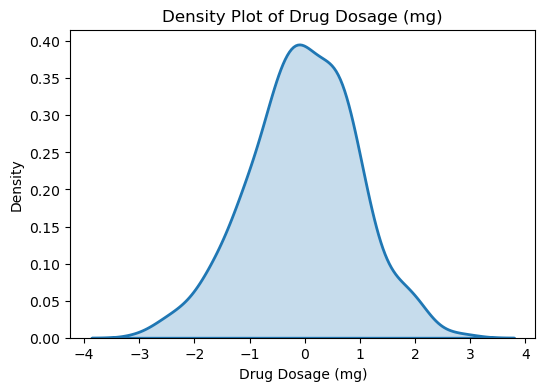

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


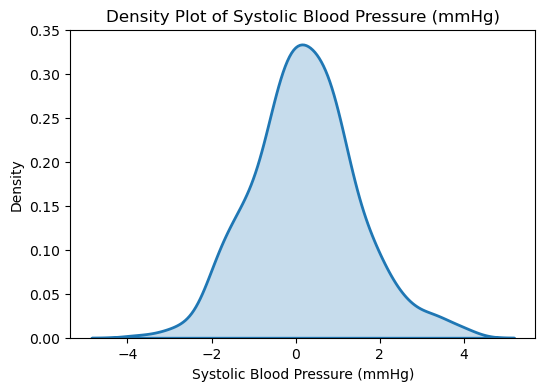

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


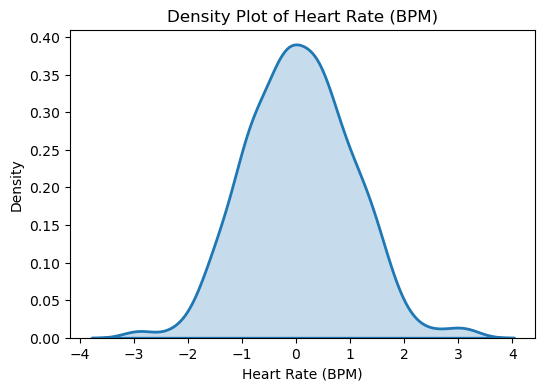

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


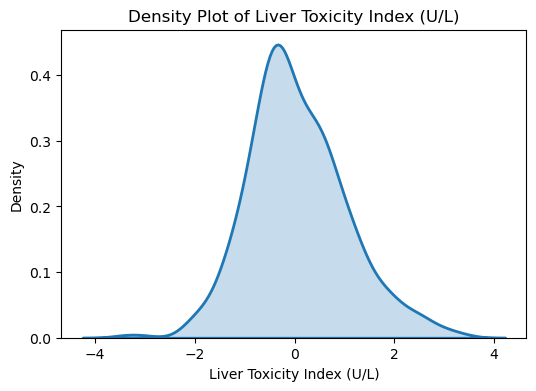

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


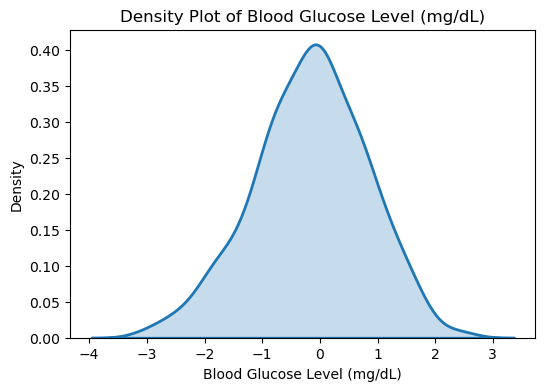

C:\Users\moulika\AppData\Local\Temp\ipykernel_44000\700599113.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, linewidth=2)


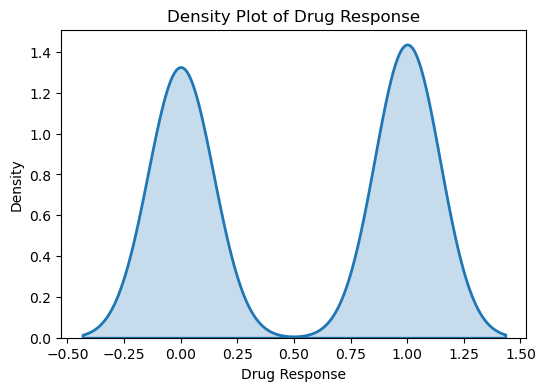

In [14]:
# Densityplot for each feature
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], shade=True, linewidth=2)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [15]:
# 3.Investigate feature correlations to discern relationships within the data.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols

['Drug Dosage (mg)',
 'Systolic Blood Pressure (mmHg)',
 'Heart Rate (BPM)',
 'Liver Toxicity Index (U/L)',
 'Blood Glucose Level (mg/dL)',
 'Drug Response']

In [16]:
# Compute Correlation Matrix
corr_matrix=df[numeric_cols].corr()
corr_matrix

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.090618,0.040571,0.128127,0.012434,0.043457
Systolic Blood Pressure (mmHg),0.090618,1.000000,-0.039195,0.283672,0.037228,0.305226
Heart Rate (BPM),0.040571,-0.039195,1.000000,0.005818,0.049897,-0.009715
Liver Toxicity Index (U/L),0.128127,0.283672,0.005818,1.000000,0.229474,0.434722
Blood Glucose Level (mg/dL),0.012434,0.037228,0.049897,0.229474,1.000000,0.169342
Drug Response,0.043457,0.305226,-0.009715,0.434722,0.169342,1.000000


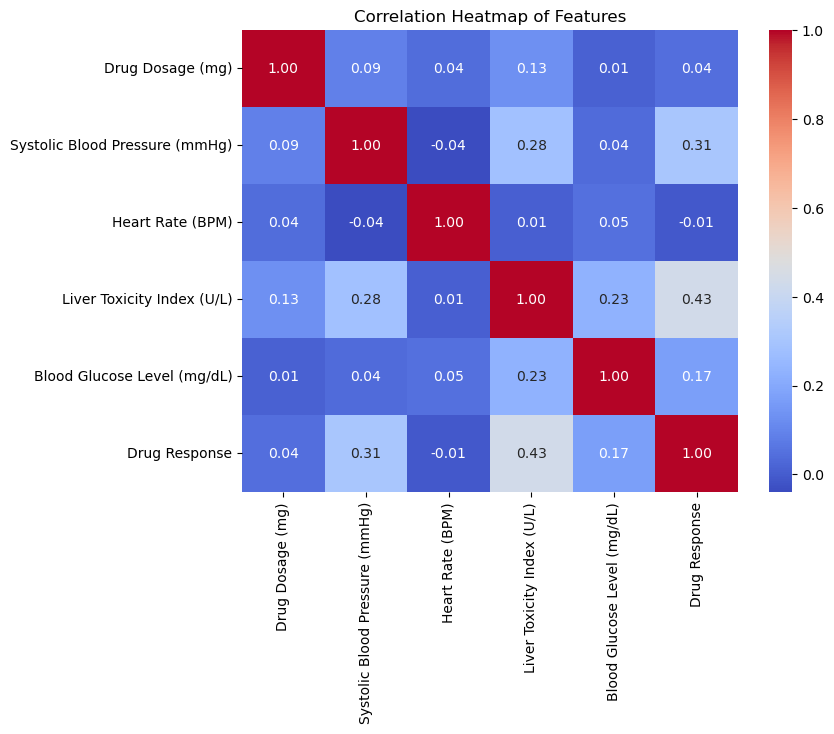

In [17]:
# Visualize the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [18]:
# Identify Strong Correlations
strong_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
strong_corr

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.0,NaN,NaN,NaN,NaN,NaN
Systolic Blood Pressure (mmHg),NaN,1.0,NaN,NaN,NaN,NaN
Heart Rate (BPM),NaN,NaN,1.0,NaN,NaN,NaN
Liver Toxicity Index (U/L),NaN,NaN,NaN,1.0,NaN,NaN
Blood Glucose Level (mg/dL),NaN,NaN,NaN,NaN,1.0,NaN
Drug Response,NaN,NaN,NaN,NaN,NaN,1.0


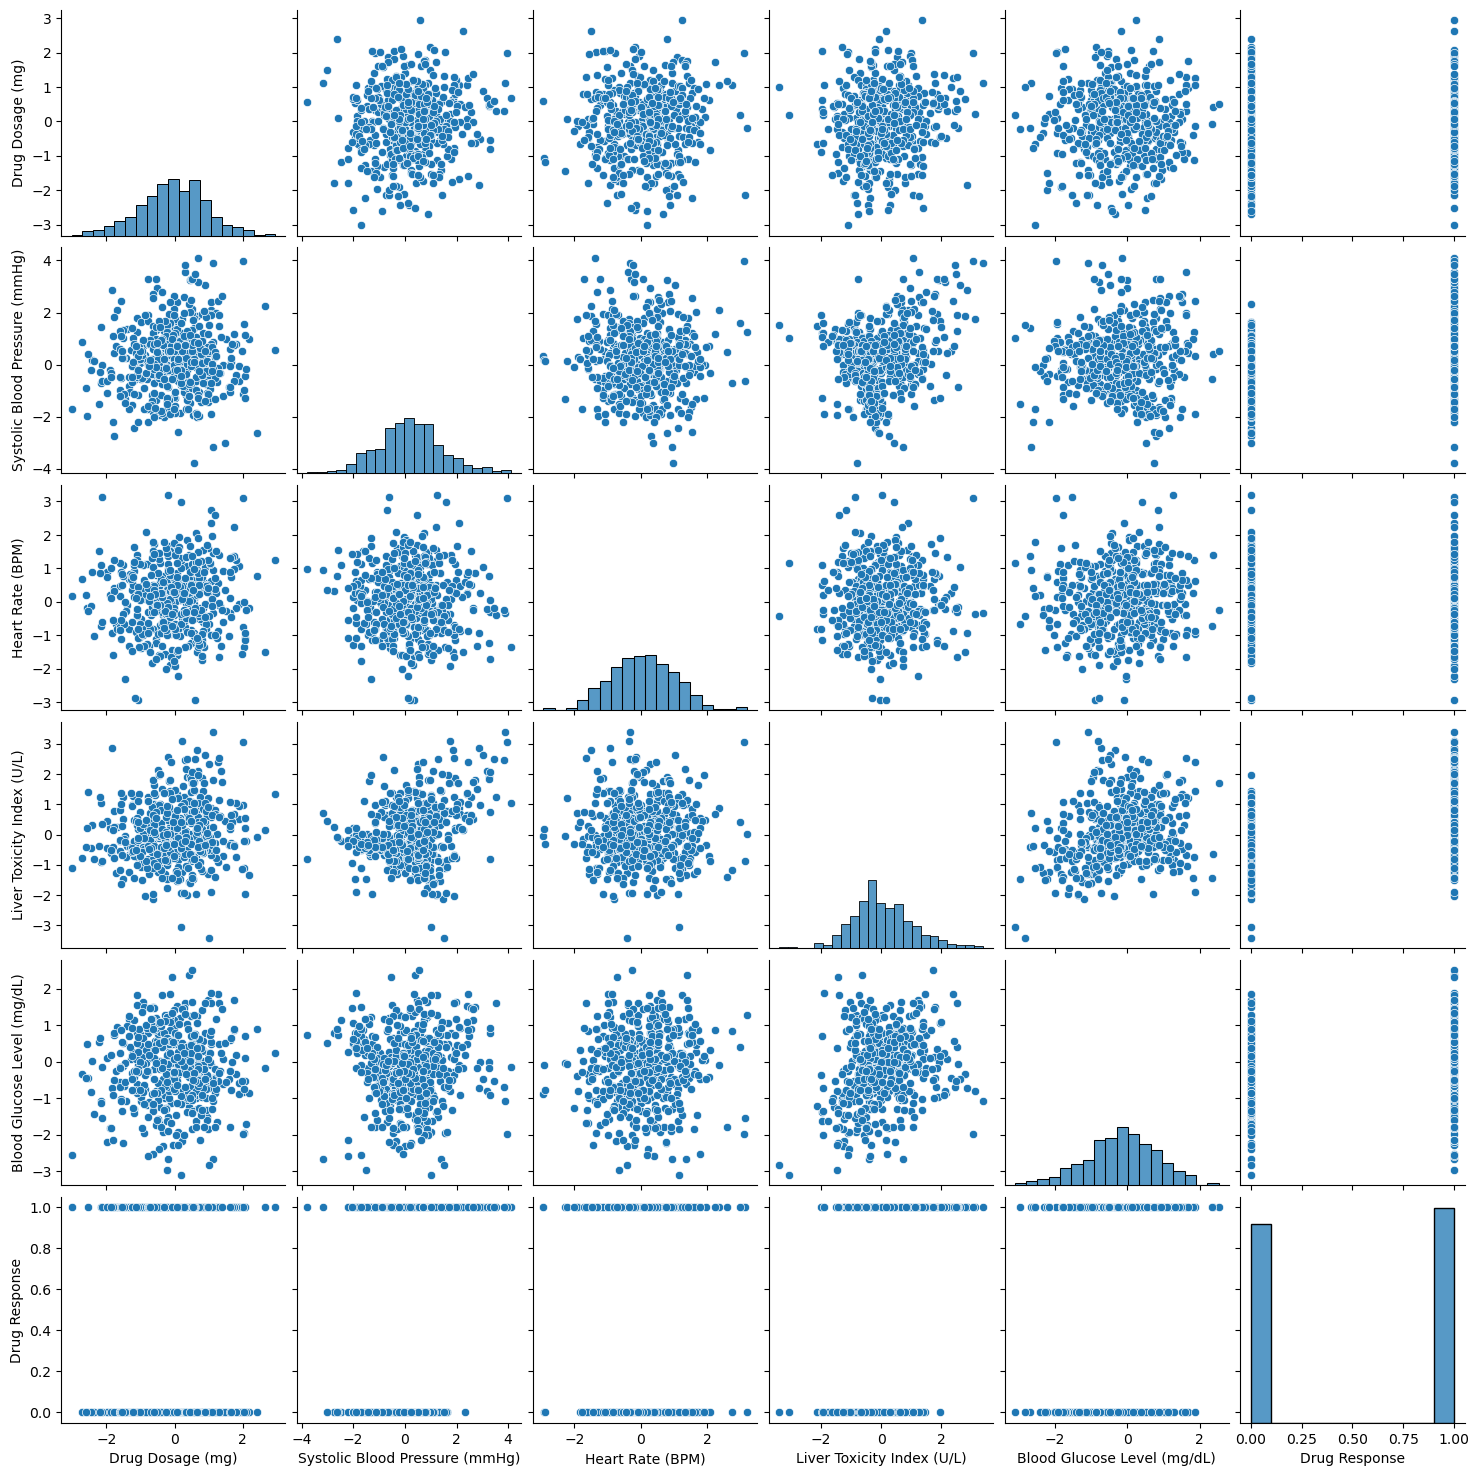

In [19]:
# Pairplot for visual relationships
sns.pairplot(df[numeric_cols])
plt.show()

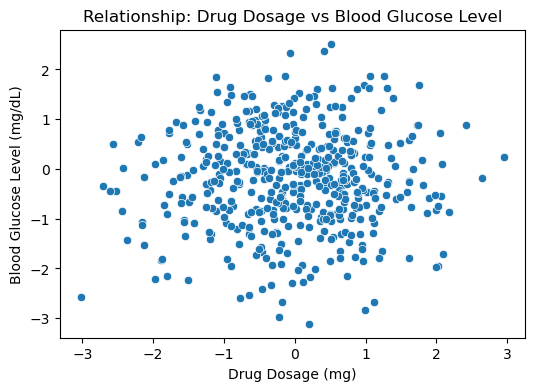

In [20]:
# Create scatterplots for specific strongly related pairs
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['Drug Dosage (mg)'], 
    y=df['Blood Glucose Level (mg/dL)']
)
plt.title("Relationship: Drug Dosage vs Blood Glucose Level")
plt.show()

In [21]:
# Task 2: Data Preprocessing
# 1.Encode categorical variables if necessary.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label Encoding for all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [22]:
# 2.Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Drug Response", axis=1)
y = df_encoded["Drug Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 5)
X_test shape: (100, 5)
y_train shape: (400,)
y_test shape: (100,)


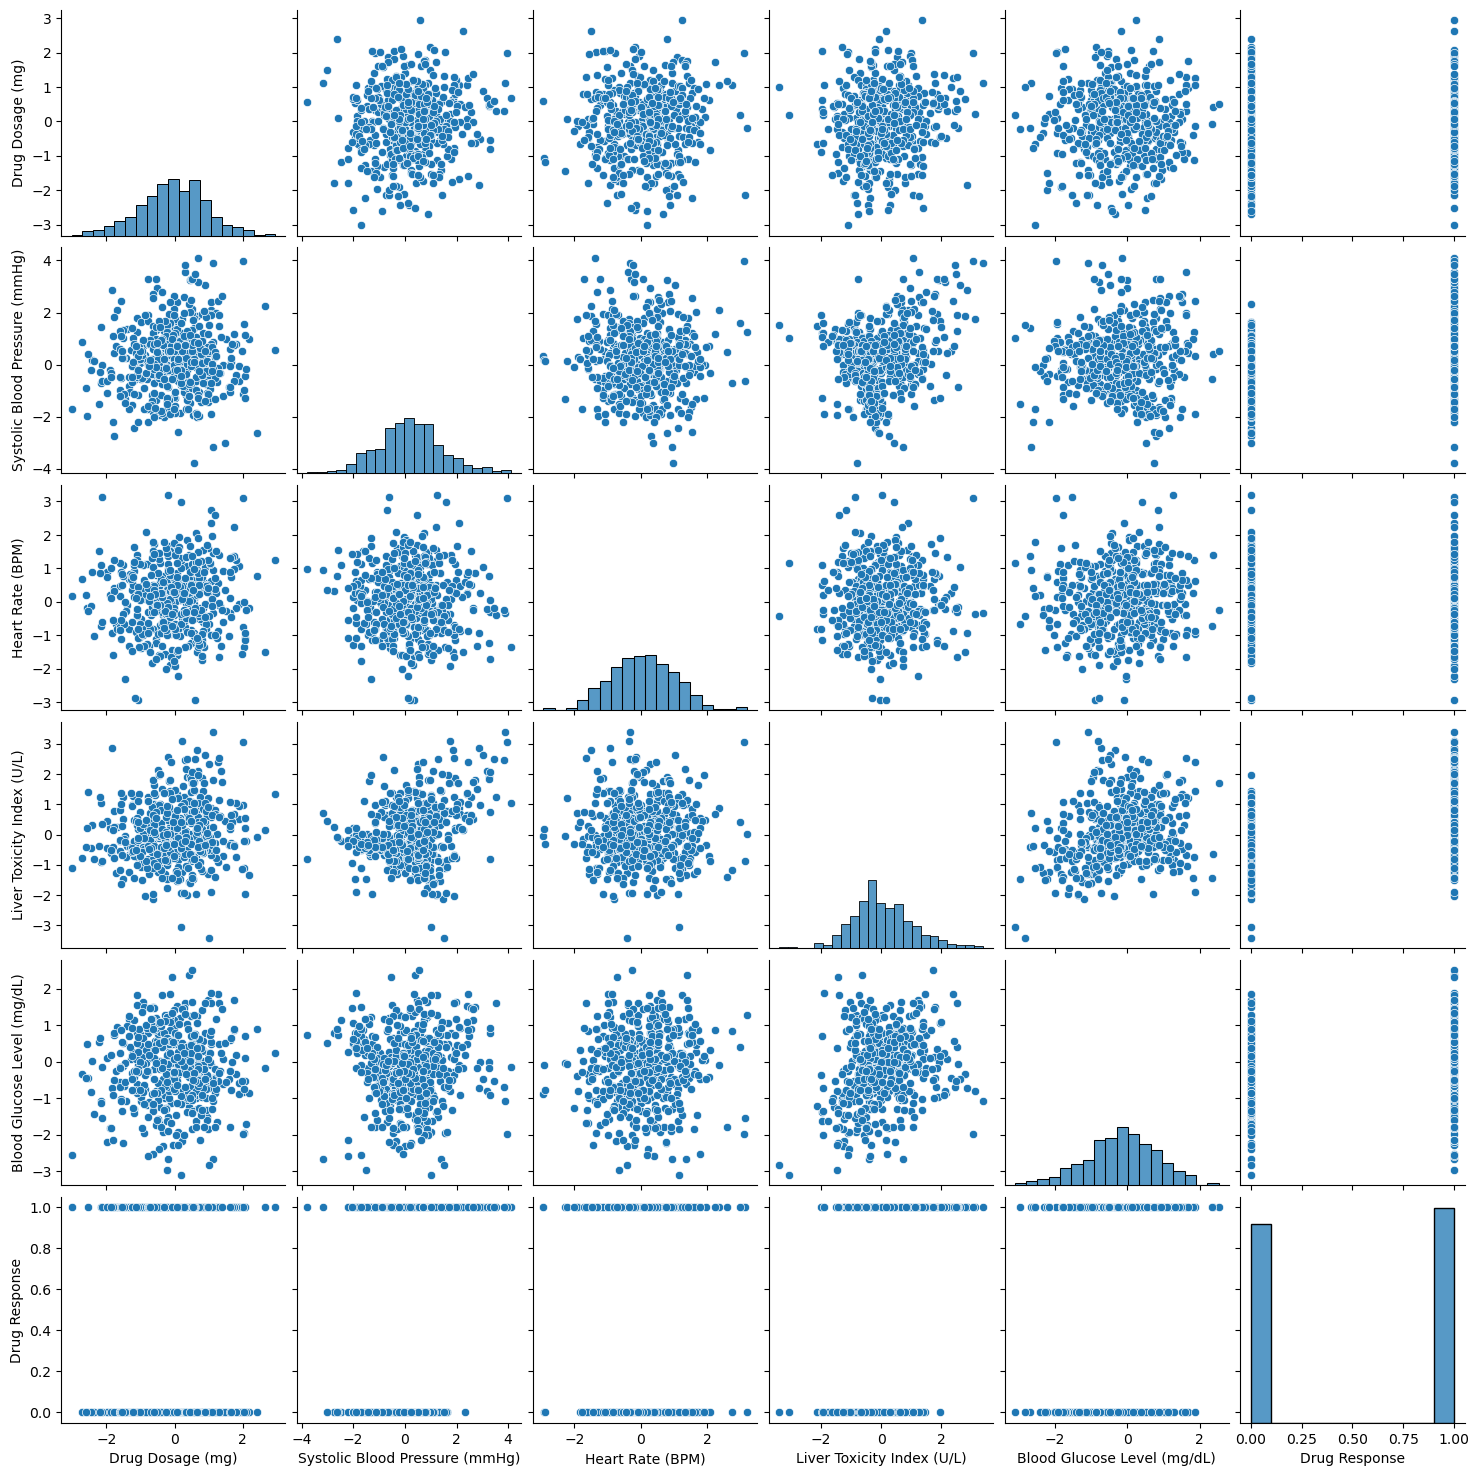

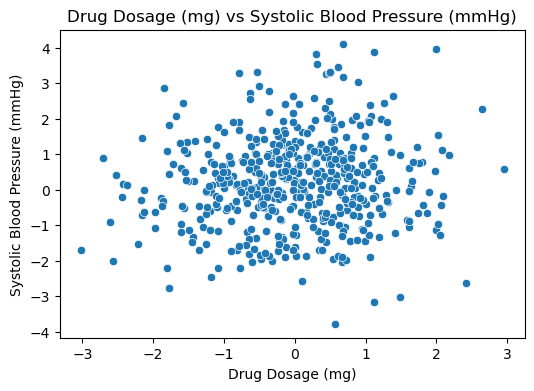

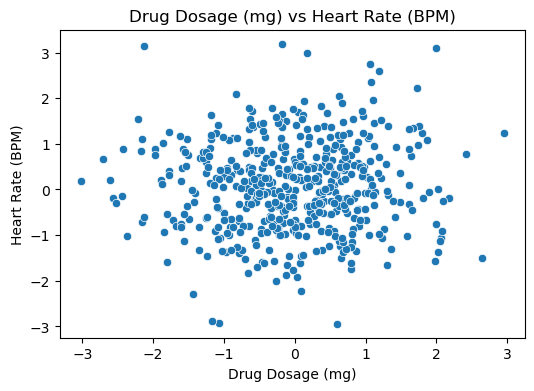

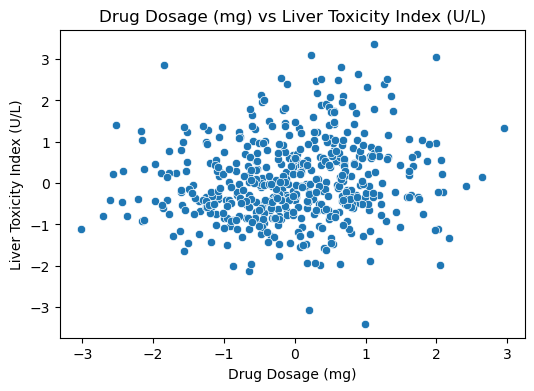

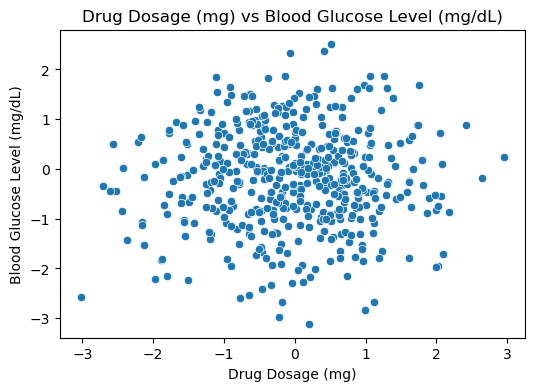

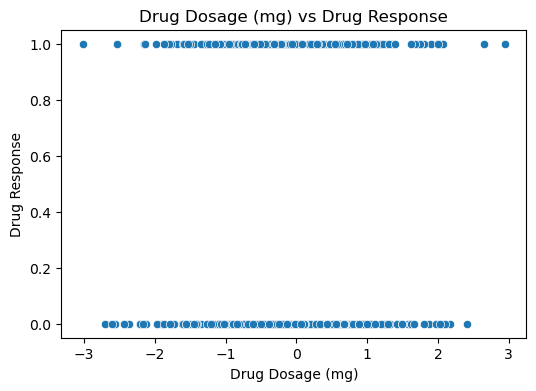

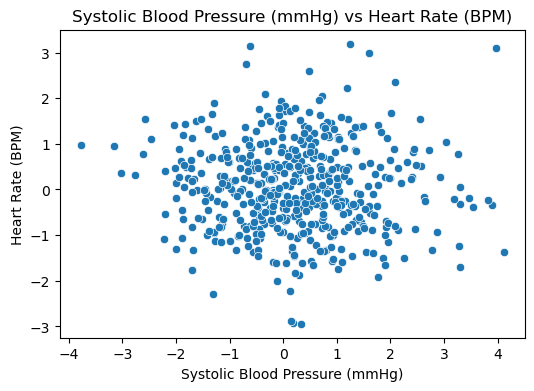

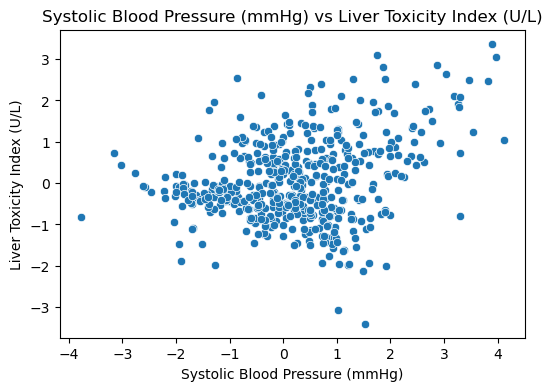

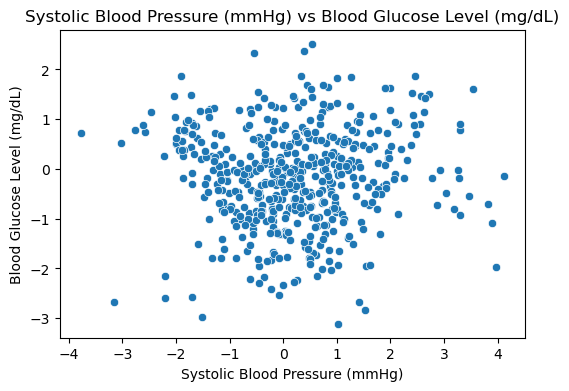

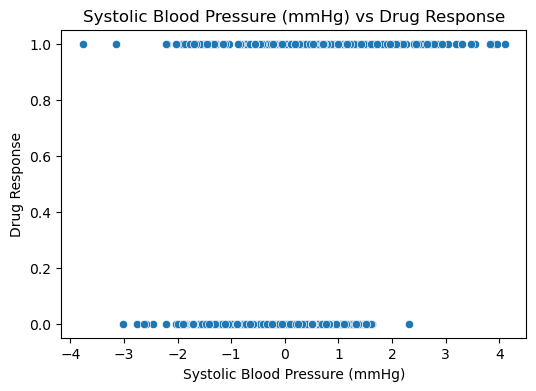

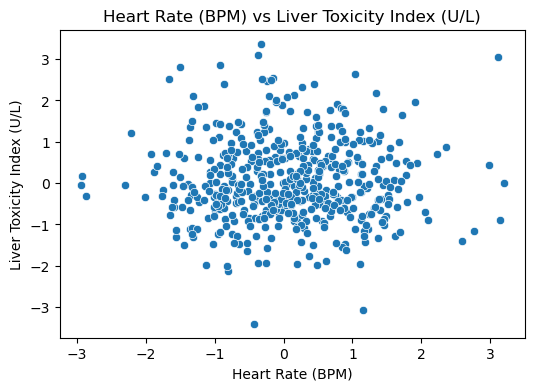

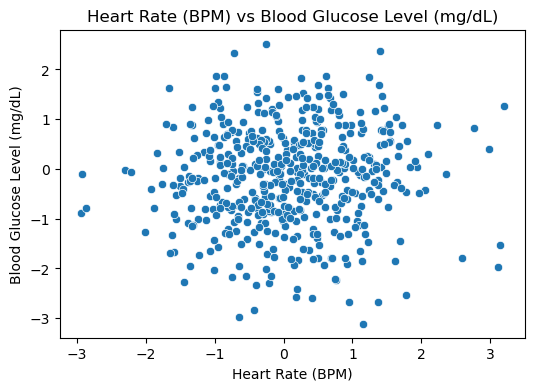

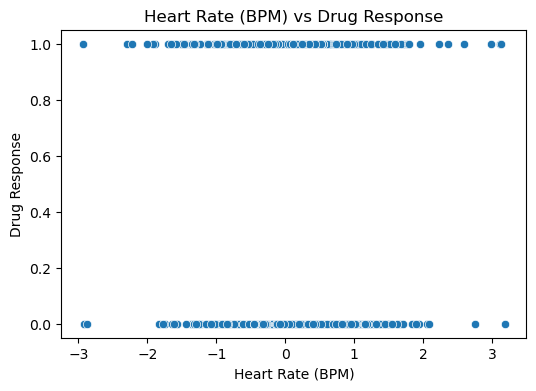

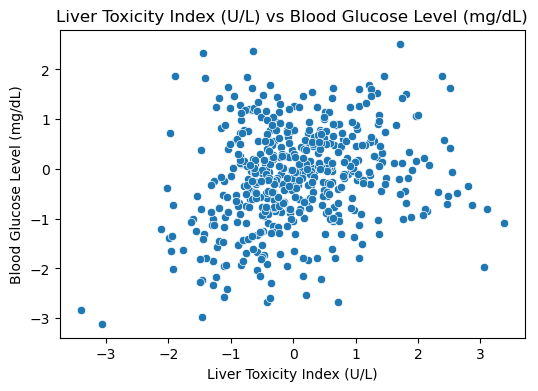

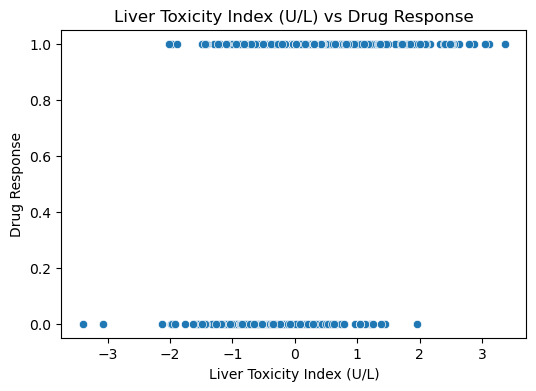

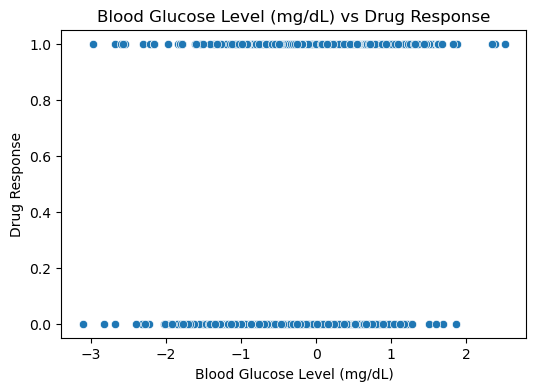

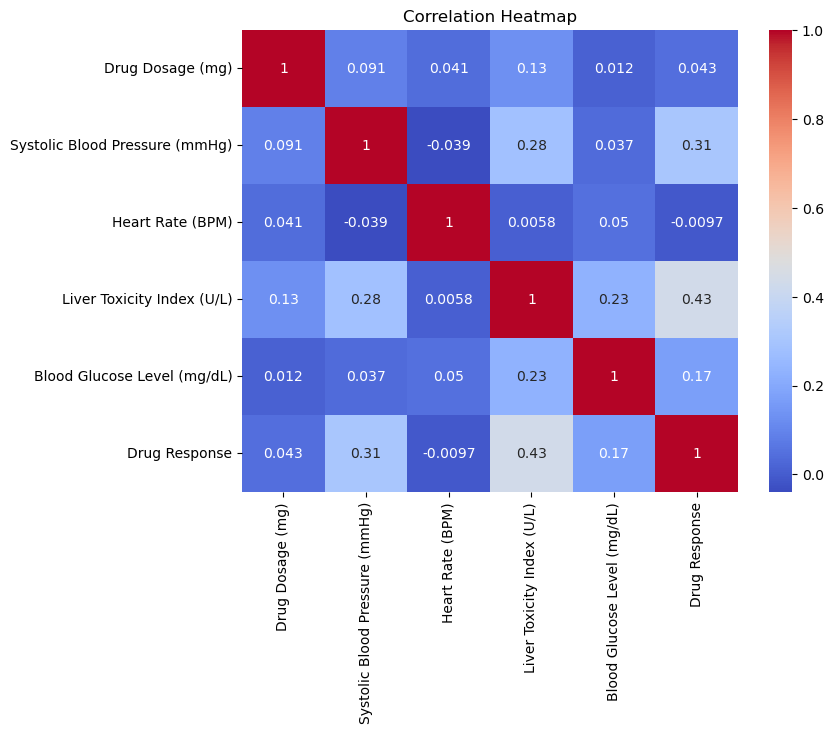

In [23]:
# Task 3: Data Visualization
# 1.Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Numeric columns only
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Pair Plot
sns.pairplot(df[numeric_cols])
plt.show()

# Scatter plots for all numeric pairs
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[j]])
        plt.title(f"{numeric_cols[i]} vs {numeric_cols[j]}")
        plt.show()

# Correlation heatmap (visual relationship)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

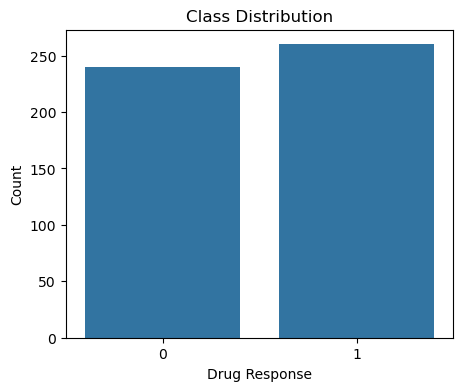

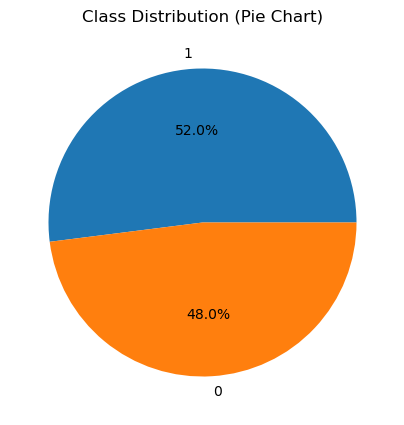

In [24]:
# 2.Visualize class distributions to gauge dataset balance or imbalance.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df["Drug Response"])
plt.title("Class Distribution")
plt.xlabel("Drug Response")
plt.ylabel("Count")
plt.show()

# Pie chart (optional)
df["Drug Response"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("")
plt.show()

In [25]:
# Task 4: SVM Implementation
# 1.Implement a basic SVM classifier using Python libraries like scikit-learn.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Prepare data
X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SVM classifier
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Confusion Matrix:
 [[35 13]
 [ 9 43]]


In [26]:
# 2.Train the SVM model on the training data.
from sklearn.svm import SVC

# Create and train SVM model
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [27]:
# 3.Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = svm_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Confusion Matrix:
 [[35 13]
 [ 9 43]]


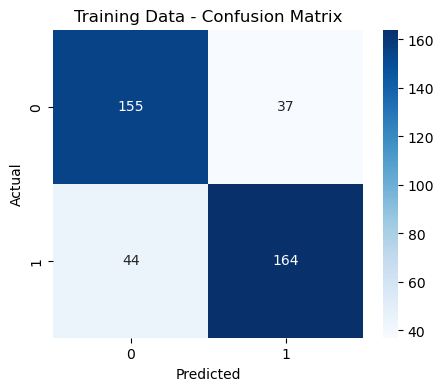

Training Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       192
           1       0.82      0.79      0.80       208

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



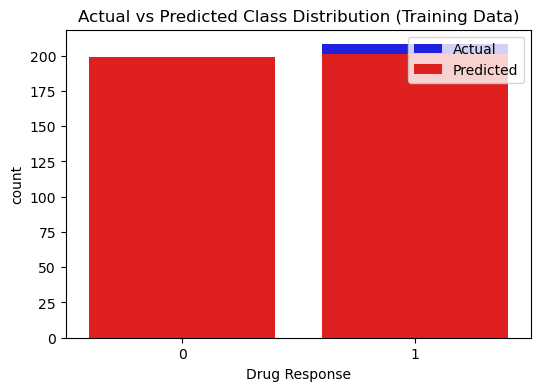

In [28]:
### Task 5: Visualization of SVM Results
# 1.Visualize classification results on the testing data.
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on training data
y_train_pred = svm_model.predict(X_train)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Training Data - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Training Classification Report:\n")
print(classification_report(y_train, y_train_pred))

# Plot Actual vs Predicted Counts
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, label="Actual", color="blue")
sns.countplot(x=y_train_pred, label="Predicted", color="red")
plt.legend(["Actual", "Predicted"])
plt.title("Actual vs Predicted Class Distribution (Training Data)")
plt.show()

In [29]:
# Task 6: Parameter Tuning and Optimization
# 1.Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Features and target
X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]

# Train-Test Split  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SVM Hyperparameter Tuning

param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1]
}

svm = SVC()

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_svm = grid.best_estimator_

# Evaluate tuned SVM on test data
y_pred_tuned = best_svm.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.7725000000000002
Test Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        48
           1       0.73      0.77      0.75        52

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100

Confusion Matrix:
 [[33 15]
 [12 40]]


In [30]:
### Task 7: Comparison and Analysis
# 1.Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load dataset

df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    
    print(f"SVM Kernel: {kernel.upper()}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

print("\nKernel Comparison:", results)

SVM Kernel: LINEAR
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

SVM Kernel: POLY
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.77      0.65      0.71        52

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100

SVM Kernel: RBF
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.

In [31]:
# 2.Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\10. SVM\\Pharma_Industry.csv")

# Correlation analysis
corr = df.corr()
strong_corr = corr[(corr > 0.5) | (corr < -0.5)]

# Prepare data
X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM (RBF)
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

# Kernel comparison
kernels = ["linear", "poly", "rbf", "sigmoid"]
kernel_scores = {}
for k in kernels:
    m = SVC(kernel=k)
    m.fit(X_train, y_train)
    kernel_scores[k] = accuracy_score(y_test, m.predict(X_test))

# Automatic strengths & weaknesses
print("SVM ANALYSIS")

print("Strengths")
if acc > 0.70:
    print("High accuracy on this dataset:", round(acc, 3))
if strong_corr.values.any():
    print("Works well with moderately correlated numeric features.")
if kernel_scores["rbf"] == max(kernel_scores.values()):
    print("RBF kernel performs best → handles non-linear relations well.")
if report["1"]["precision"] > 0.70:
    print("Good at identifying positive cases (Class 1).")

print("\n--- Weaknesses ---")
if report["0"]["recall"] < 0.70:
    print("SVM struggles to correctly identify Class 0.")
if cm[0][1] > cm[1][0]:
    print("More false positives → model sometimes overpredicts Class 1.")
if kernel_scores["linear"] < kernel_scores["rbf"]:
    print("Linear kernel performs weakly → data is NOT linearly separable.")
if any(abs(corr["Drug Response"]) < 0.2):
    print("Weak correlation between features and target → harder classification.")

print("Kernel Comparison (Accuracy)")
print(kernel_scores)

print("Confusion Matrix")
print(cm)

print("\n--- Classification Report ")
print(classification_report(y_test, y_pred))

print("\n--- Strong Correlations Detected ---")
print(strong_corr)


================ SVM ANALYSIS =================

--- Strengths ---
✔ High accuracy on this dataset: 0.78
✔ Works well with moderately correlated numeric features.
✔ RBF kernel performs best → handles non-linear relations well.
✔ Good at identifying positive cases (Class 1).

--- Weaknesses ---
✘ More false positives → model sometimes overpredicts Class 1.
✘ Linear kernel performs weakly → data is NOT linearly separable.
✘ Weak correlation between features and target → harder classification.

--- Kernel Comparison (Accuracy) ---
{'linear': 0.72, 'poly': 0.72, 'rbf': 0.78, 'sigmoid': 0.68}

--- Confusion Matrix ---
[[35 13]
 [ 9 43]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100




In [33]:
# 3.Discuss practical implications of SVM in real-world classification tasks.
text = """Practical Implications of SVM in Real-World Classification

1. High Accuracy for Complex Boundaries:
   - SVM performs exceptionally well when decision boundaries are non-linear.
   - RBF and polynomial kernels handle real-world curved boundaries effectively.

2. Effective in High-Dimensional Spaces:
   - SVM is useful in fields like bioinformatics, text classification, and genomics
     where dataset features are large and complex.

3. Robust Against Overfitting:
   - With proper regularization (C parameter), SVM avoids overfitting even with
     moderate-sized datasets.

4. Works Well with Limited Data:
   - Unlike deep learning, SVM does not require huge datasets to achieve good accuracy.

5. Handles Noisy Data with Soft Margin:
   - Soft-margin SVM allows some misclassification, making it practical for imperfect data.

6. Kernel Trick Enhances Versatility:
   - Kernels transform data into higher dimensions without extra computation.
   - Useful for image recognition, fraud detection, medical diagnosis, and pattern recognition.

7. Sensitive to Feature Scaling:
   - Real-world applications require standardization for SVM to perform well.

8. Computationally Intensive for Large Datasets:
   - Training time increases significantly with millions of samples.
   - Not ideal for real-time large-scale systems unless optimized.

9. Less Interpretable:
   - SVM does not provide easy-to-understand feature importance, limiting transparency.

10. Widely Used In:
    - Medical diagnosis (cancer detection, disease classification)
    - Drug response prediction (as in this project)
    - Face recognition and biometric authentication
    - Spam detection, document classification
    - Manufacturing quality control
    - Fraud and anomaly detection

"""

print(text)

Practical Implications of SVM in Real-World Classification

1. High Accuracy for Complex Boundaries:
   - SVM performs exceptionally well when decision boundaries are non-linear.
   - RBF and polynomial kernels handle real-world curved boundaries effectively.

2. Effective in High-Dimensional Spaces:
   - SVM is useful in fields like bioinformatics, text classification, and genomics
     where dataset features are large and complex.

3. Robust Against Overfitting:
   - With proper regularization (C parameter), SVM avoids overfitting even with
     moderate-sized datasets.

4. Works Well with Limited Data:
   - Unlike deep learning, SVM does not require huge datasets to achieve good accuracy.

5. Handles Noisy Data with Soft Margin:
   - Soft-margin SVM allows some misclassification, making it practical for imperfect data.

6. Kernel Trick Enhances Versatility:
   - Kernels transform data into higher dimensions without extra computation.
   - Useful for image recognition, fraud detectio